In [1]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

# Debug Dataset

In [2]:
from src.utils.data_utils import EcgDataModule
ecg_data_module = EcgDataModule()

In [3]:
train_ds, val_ds, test_ds = ecg_data_module.load_ds_with_feat(False)

In [ ]:
train_ds, val_ds, test_ds = ecg_data_module.load_processed_ds()

In [4]:
val_ds.signals[0].HR

62.153072

In [64]:
from src.basic.cardiac_cycle import CardiacCycle
for ds in [train_ds, val_ds, test_ds]:
    for signal_idx in range(len(ds)):
        for lead_idx in range(12):
            all_cycles = ds.signals[signal_idx].all_cycles[lead_idx]
            for i in range(len(all_cycles)):
                cycle = all_cycles[i]
                all_cycles[i] = CardiacCycle(P_onset=cycle.P_onset, P_peak=cycle.P_peak, P_offset=cycle.P_offset,
                                            QRS_onset=cycle.QRS_onset, Q_peak=cycle.Q_peak, R_peak=cycle.R_peak,
                                            S_peak=cycle.S_peak, QRS_offset=cycle.QRS_offset, T_onset=cycle.T_onset,
                                            T_peak=cycle.T_peak, T_offset=cycle.T_offset)


In [60]:
for ds in [train_ds, val_ds, test_ds]:
    for signal in ds.signals:
        for lead_idx in range(12):
            for cycle in signal.all_cycles[lead_idx]:
                cycle.extra_info.clear()
        signal.add_extra_info()

In [6]:
for ds in [train_ds, val_ds, test_ds]:
    for signal in ds.signals:
        # signal.calc_ST()
        # signal.calc_PRWP()
        signal.calc_T()

In [ ]:
for ds in [train_ds, val_ds, test_ds]:
    ds.as32bit()
    ds.calc_feat()

In [5]:
val_ds.signals[0].R_AMP_V1

0.10993073

In [12]:
for i in range(3000):
    val_ds[i]

In [107]:
ecg_data_module.save_datasets(train_ds, val_ds, test_ds, '_with_feat')

In [57]:
import sys
val_ds.signals[0].DEEP_S_V5

0.0

In [58]:
val_ds.signals[0].R_AMP_V1

0.10993073

In [49]:
print(sys.getsizeof(val_ds.signals[0].cleaned[0][0]))

28


In [4]:
type(val_ds.signals[0].all_cycles[0][0].extra_info)

dict

In [47]:
type(val_ds.signals[0].cleaned[0][0])

numpy.float32

In [4]:
(clean, obj), y = val_ds[0]

In [5]:
print(clean.dtype)
print(obj.dtype)
print(y.dtype)

torch.float32
torch.float32
torch.float32


In [91]:
val_ds.signals[0].str_diagnoses

['NORM', 'SR']

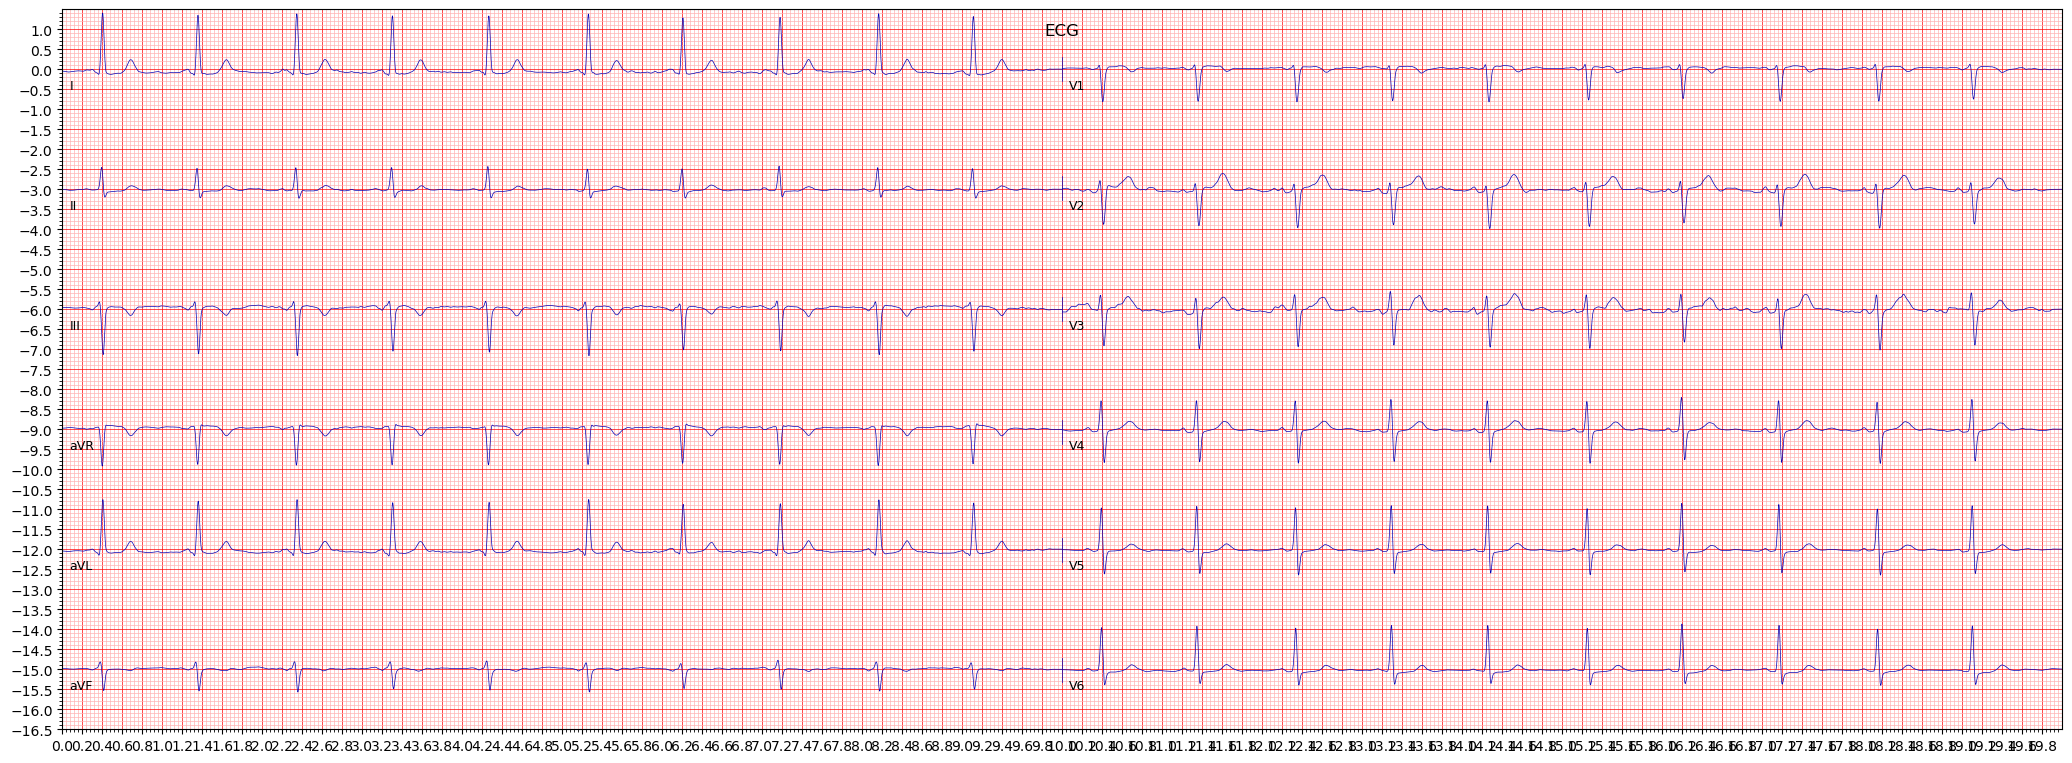

In [65]:
val_ds.signals[0].show_with_grid()

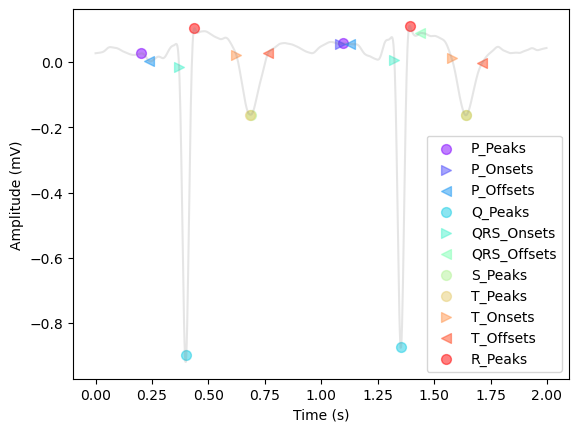

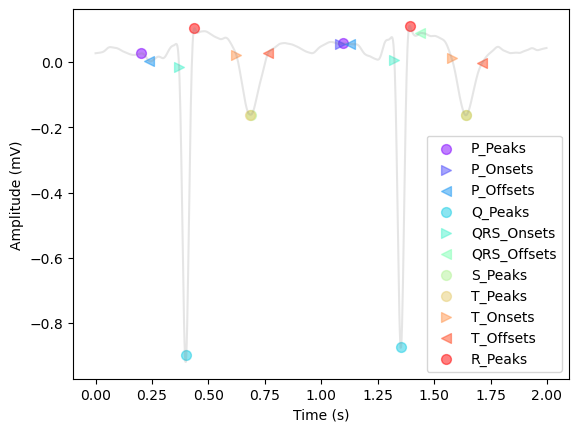

In [108]:
val_ds.signals[0].plot_delineation(lead='aVR', window_range=(0,2))

In [7]:
from src.basic.dx_and_feat import Feature
for feat, value in zip(Feature, obj):
    print(feat.name, ': ', value)

HR :  tensor(62.1531)
BRAD :  tensor(0.)
TACH :  tensor(0.)
SINUS :  tensor(0.7000)
RR_DIFF :  tensor(70.3333)
PR_DUR :  tensor(136.6147)
LPR :  tensor(0.1806)
QRS_DUR :  tensor(133.1587)
LQRS :  tensor(0.3987)
LQRS_WPW :  tensor(0.5747)
SPR :  tensor(0.3862)
ST_AMP_I :  tensor(-0.0955)
ST_AMP_II :  tensor(-0.0415)
ST_AMP_III :  tensor(0.0494)
ST_AMP_aVR :  tensor(0.0653)
ST_AMP_aVL :  tensor(-0.0718)
ST_AMP_aVF :  tensor(-0.0013)
ST_AMP_V1 :  tensor(0.0420)
ST_AMP_V2 :  tensor(0.0446)
ST_AMP_V3 :  tensor(0.0472)
ST_AMP_V4 :  tensor(-0.0254)
ST_AMP_V5 :  tensor(-0.0574)
ST_AMP_V6 :  tensor(-0.0679)
STE_I :  tensor(0.)
STE_II :  tensor(0.)
STE_III :  tensor(0.)
STE_aVR :  tensor(0.)
STE_aVL :  tensor(0.)
STE_aVF :  tensor(0.)
STE_V1 :  tensor(0.)
STE_V2 :  tensor(0.)
STE_V3 :  tensor(0.)
STE_V4 :  tensor(0.)
STE_V5 :  tensor(0.)
STE_V6 :  tensor(0.)
STD_I :  tensor(0.3333)
STD_II :  tensor(0.)
STD_III :  tensor(0.)
STD_aVR :  tensor(0.)
STD_aVL :  tensor(0.)
STD_aVF :  tensor(0.)
STD_V1

In [99]:
from src.basic.cardiac_cycle import CardiacCycle
signal = val_ds.signals[0]
lead_idx = 6
cycle: CardiacCycle = signal.all_cycles[lead_idx][0]
cleaned = signal.cleaned[lead_idx]

In [100]:

print(cycle.get_PRWP())
print(cycle.T_onset)
print(cleaned[cycle.S_peak: cycle.T_onset])

0.8165288319190344
679
[]


## Check delineation

In [40]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

10063
3365
3431


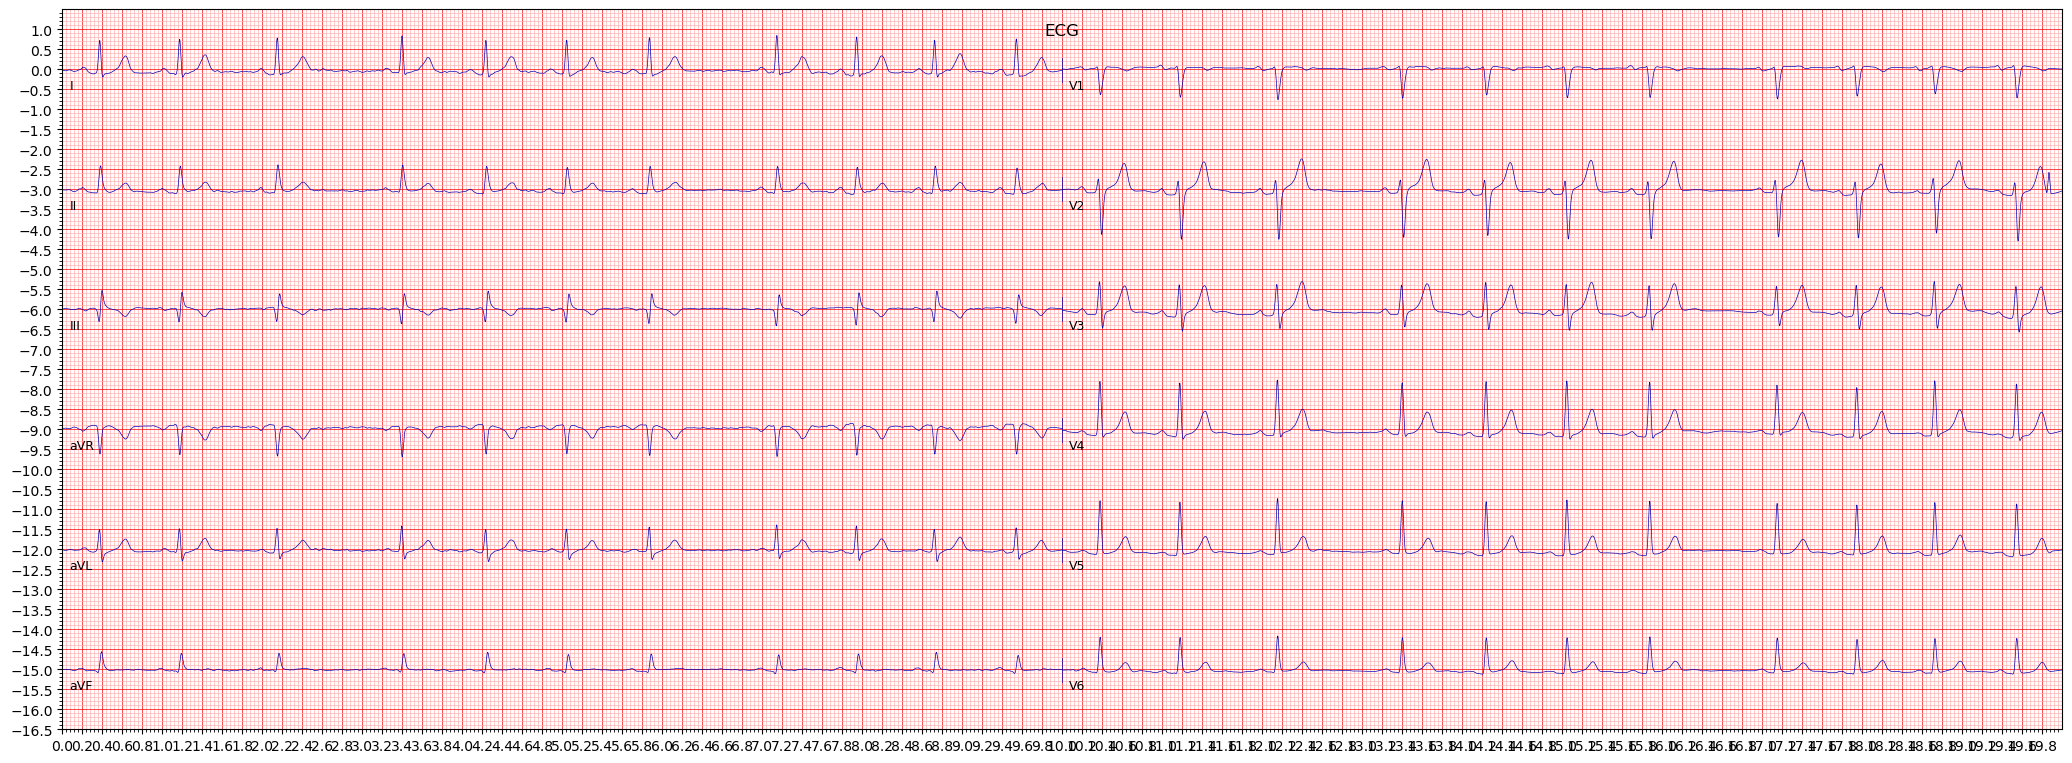

In [61]:
from src.basic.ecg import Ecg
ecg: Ecg = train_ds.find_ecg_with_diagnosis('NORM', 1234)
ecg.show_with_grid(show_cleaned=True)

lead: I


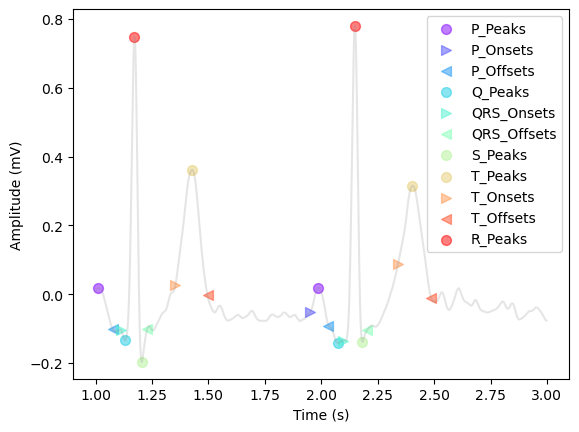

lead: II


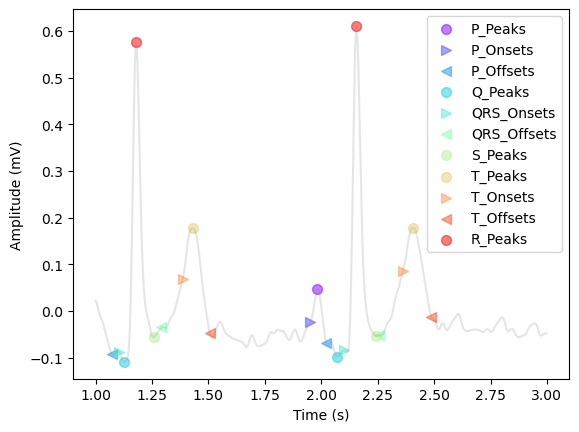

lead: III


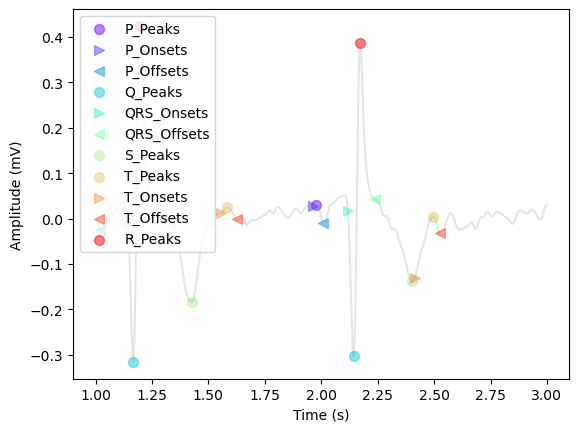

lead: aVR


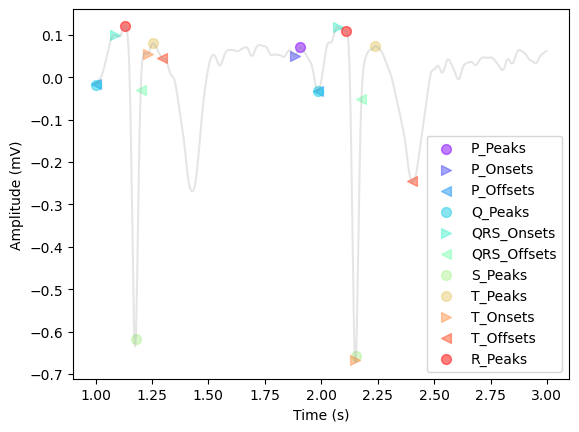

lead: aVL


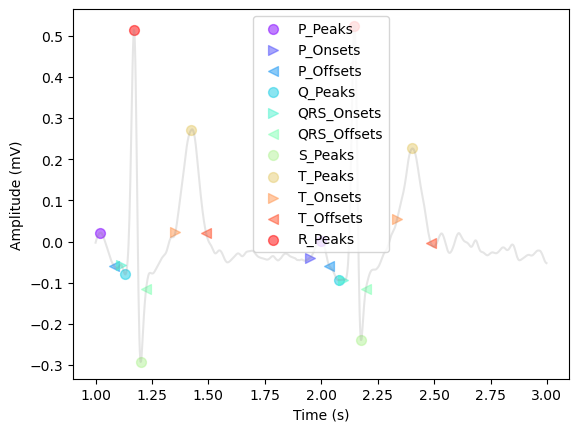

lead: aVF


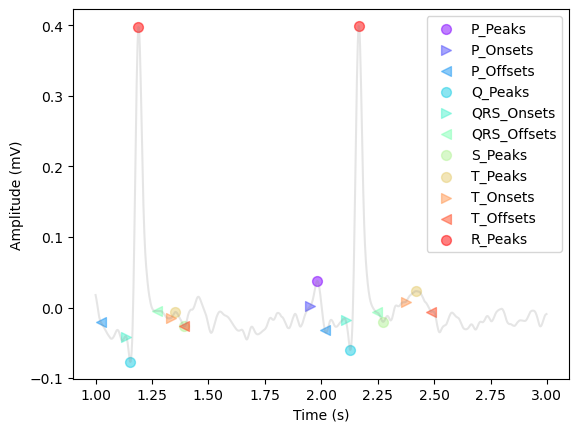

lead: V1


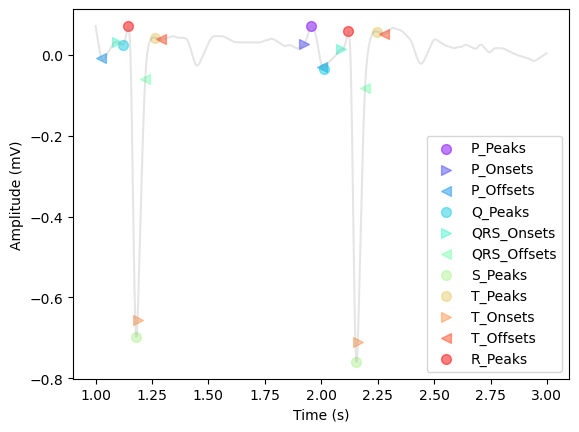

lead: V2


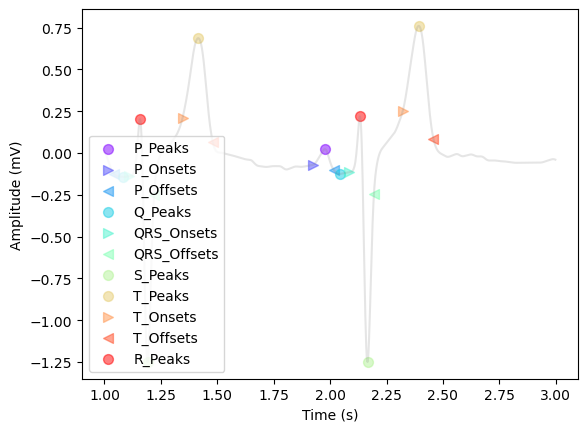

lead: V3


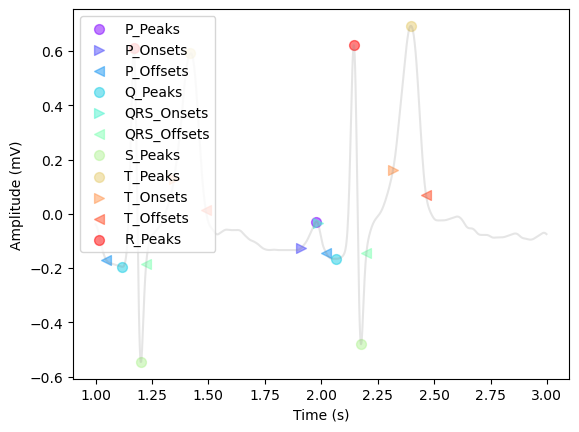

lead: V4


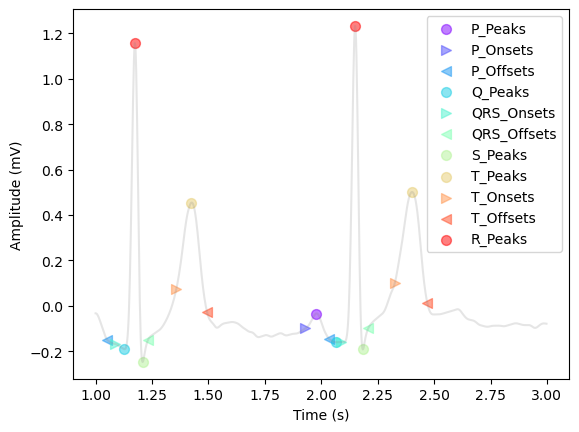

lead: V5


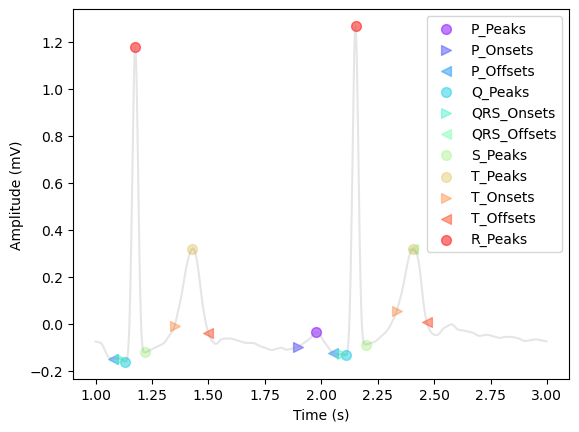

lead: V6


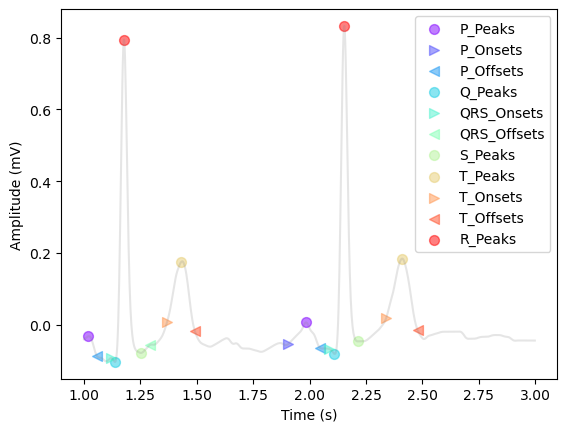

In [62]:
from src.basic.constants import ALL_LEADS
import matplotlib.pyplot as plt
def plot_all(window_range=(1,3)):
    for lead in ALL_LEADS:
        print('lead:', lead)
        fig = ecg.plot_delineation(lead=lead, window_range=window_range)
        plt.show(fig)

plot_all()

In [ ]:
ecg_data_module.setup(stage='fit')

train dataset loaded!
val dataset loaded!


In [47]:
train_ds, val_ds = ecg_data_module.train_ds, ecg_data_module.val_ds

In [75]:
from src.basic.ecg import Ecg
ecg: Ecg = train_ds.signals[54]
ecg.is_used=True

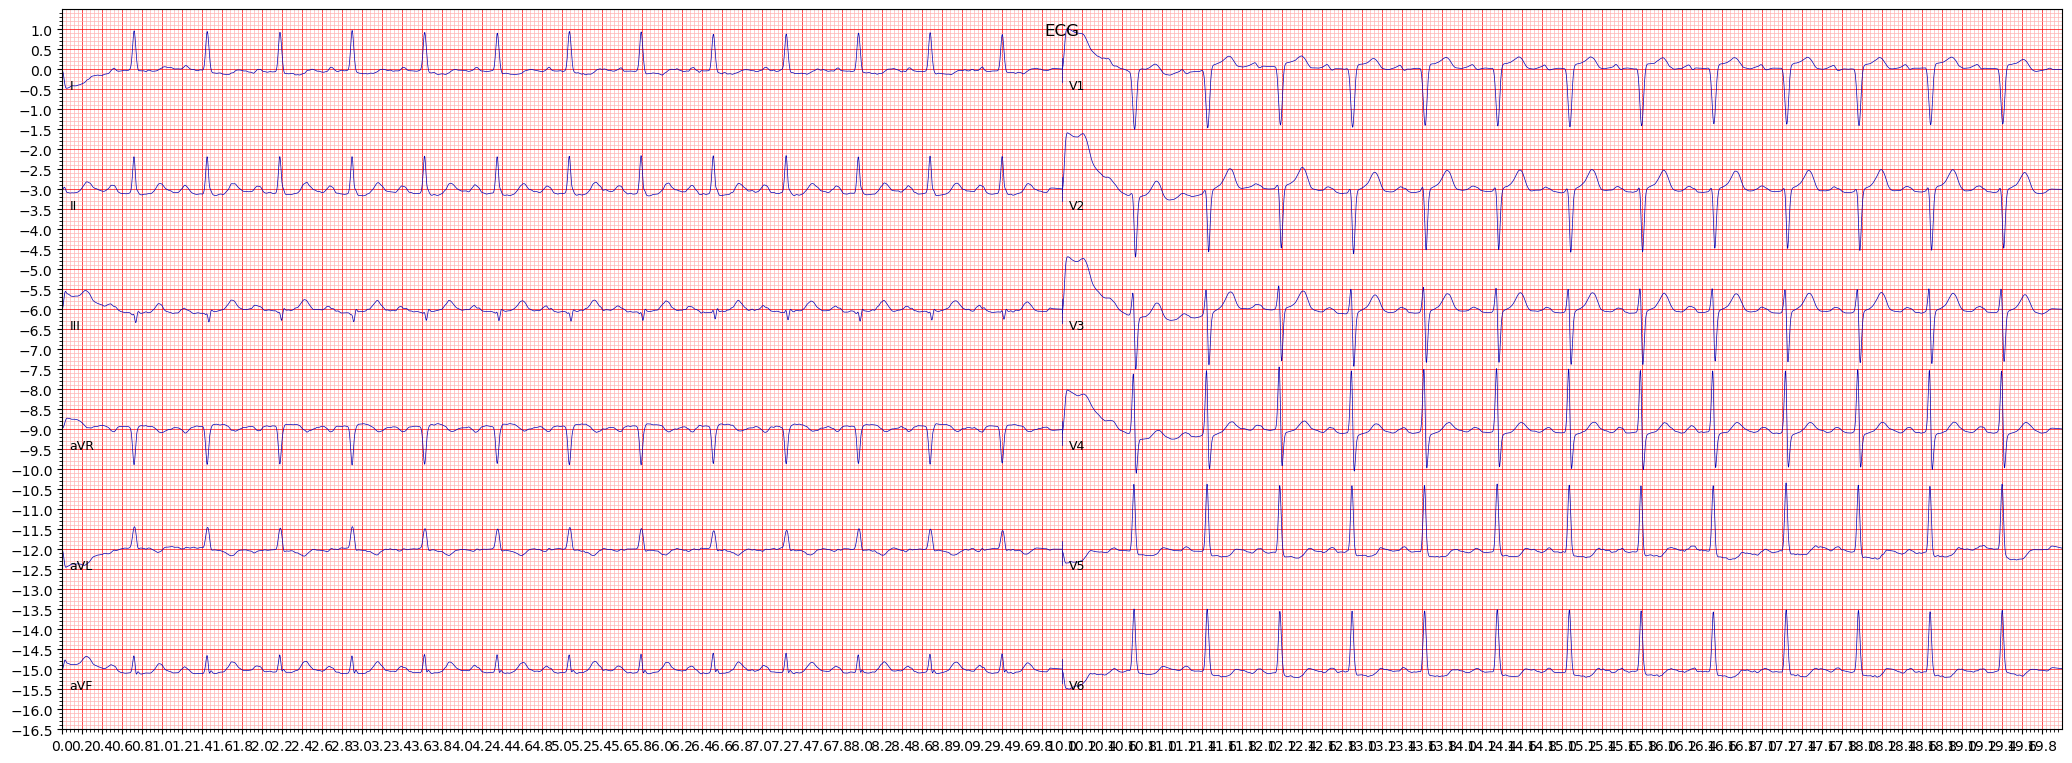

In [76]:
ecg.show_with_grid(show_cleaned=True)

In [81]:

ecg.delineate(check_T_inversion=True, check_P_inversion=True)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
Delineating inverted ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
--> Cannot delineate the ECG signal
--> Cannot delineate the inverted ECG signal
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


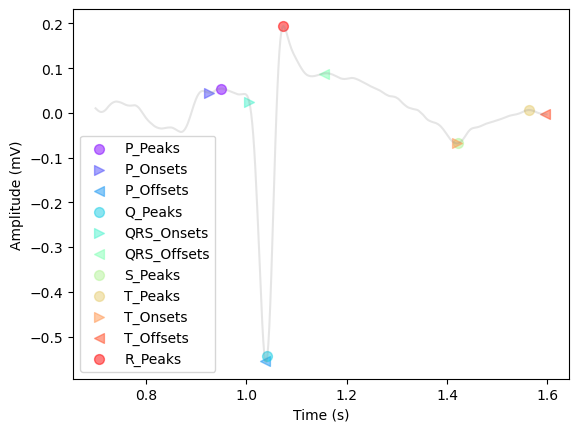

In [71]:
ecg.plot_delineation(lead='aVR')

In [68]:
for key, value in delin.items():
    if len(value) == 9:
        print(key, value)

ECG_Q_Peaks [ 467 1014 1548 2112 2654 3207 3760 4303 4853]


In [69]:
from src.utils.ecg_utils import get_delineation
delin = get_delineation(ecg.cleaned[9], ecg.all_rpeaks[9])
lengths = [len(value) for value in delin.values()]
print(lengths)
print(delin)

[10, 10, 10, 9, 10, 10, 10, 10, 10, 10, 10]
{'ECG_P_Peaks': array([  nan,  412.,  962., 1507., 2060., 2608., 3160., 3707., 4257.,
       4801.]), 'ECG_P_Onsets': array([  nan,  387.,  927., 1476., 2039., 2587., 3136., 3685., 4229.,
       4776.]), 'ECG_P_Offsets': array([  nan,  448.,  995., 1545., 2109., 2649., 3192., 3738., 4298.,
       4832.]), 'ECG_Q_Peaks': array([ 467, 1014, 1548, 2112, 2654, 3207, 3760, 4303, 4853]), 'ECG_R_Onsets': array([  nan,  414., 1028., 1568., 2132., 2616., 3230., 3777., 4328.,
       4867.]), 'ECG_R_Offsets': array([ 216.,  549., 1100., 1647., 2197., 2745., 3294., 3840., 4392.,
         nan]), 'ECG_S_Peaks': array([ 385,  535, 1085, 1632, 2183, 2730, 3279, 3825, 4377, 4924]), 'ECG_T_Peaks': array([ 408.,  714., 1267., 1813., 2367., 2913., 3462., 4008., 4557.,
         nan]), 'ECG_T_Onsets': array([ 388.,  682., 1239., 1787., 2339., 2883., 3437., 3981., 4533.,
         nan]), 'ECG_T_Offsets': array([ 448.,  746., 1305., 1919., 2393., 2946., 3501., 4035.,

In [18]:
inverted_ecg: Ecg = ecg.invert()
inverted_ecg_delineations, _, _ = inverted_ecg.delineate(check_T_inversion=False,
                                                        check_P_inversion=False)
lengths = [len(value) for value in inverted_ecg_delineations[3].values()]
print(lengths)

Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


In [ ]:
from src.utils.ecg_utils import get_all_delineations
get_all_delineations(ecg.cleaned, ecg.all_rpeaks)

In [ ]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)

In [29]:
print(len(ecg.delineations[3]['ECG_Q_Peaks']))
print(len(inverted_ecg_delineations[3]['ECG_R_Peaks']))

12
13


In [39]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [40]:
for i in range(12):
    lengths = [len(value) for value in inverted_ecg.delineations[i].values()]
    print(lengths)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [41]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
original delineation 13
inverted delineation 13
2
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [43]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

Delineating ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [34]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
print(ecg.delineations[3]['ECG_R_Peaks'])
print(inverted_ecg_delineations[3]['ECG_R_Peaks'])

Delineating ECG signal...
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
original delineation 13
inverted delineation 13
2
[ 269  662 1050 1440 1830 2224 2620 3013 3401 3793 4182 4570]
[ 286  679 1067 1457 1848 2242 2637 3030 3418 3810 4199 4587 4905]


In [13]:
for i in range(12):
    lengths = [len(value) for value in ecg.delineations[i].values()]
    print(lengths)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 12]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


# Check Modules

In [ ]:
!python '/home/ftian/storage/ECG_XAI/src/scripts/train/soft_rule_mlp.py'

In [ ]:
!python '/Users/tf/Computer_Science/Archive/FYP/ECG_XAI/src/scripts/train/basic_cnn.py'

In [ ]:
!python '/Users/tf/Computer_Science/Archive/FYP/ECG_XAI/src/scripts/train/soft_rule_mpav.py'

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

In [6]:
from src.utils.data_utils import EcgDataModule
import optuna
from optuna.samplers import TPESampler, QMCSampler
use_qmc_sampler = True
seed = 5
ecg_datamodule = EcgDataModule(batch_size=4, num_workers=0)
sampler = QMCSampler(scramble=True, seed=seed) if use_qmc_sampler else TPESampler(seed=seed)
study = optuna.create_study(direction="minimize", sampler=sampler)
# ecg_datamodule.setup(stage='fit')

/var/folders/8y/qvy3_f2n0ml270_xnsrv8_780000gn/T/ipykernel_16140/2241987499.py:7: ExperimentalWarning: QMCSampler is experimental (supported from v3.0.0). The interface can change in the future.
  sampler = QMCSampler(scramble=True, seed=seed) if use_qmc_sampler else TPESampler(seed=seed)
[I 2023-03-28 18:02:25,062] A new study created in memory with name: no-name-f9b65a82-4efb-4d50-9aa8-834555c66091


In [7]:
import os
import optuna
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
from src.models.ecg_step_module import EcgEmbed, RhythmModule, BlockModule, WPWModule, STModule, QRModule, PModule, VHModule, TModule, AxisModule, EcgPipeline  # noqa: E501
from src.basic.constants import TRAIN_LOG_PATH
from src.utils.data_utils import EcgDataModule
from src.utils.train_utils import get_axis_hparams, get_block_hparams, get_common_trainer_params, get_ecg_embed_hparams, get_optim_hparams, get_p_hparams, get_pipeline_hparams, get_qr_hparams, get_rhythm_hparams, get_st_hparams, get_t_hparams, get_trainer_callbacks, get_vh_hparams, get_wpw_hparams, tune, visualize_study  # noqa: E501

# not-tuned Parameters
N_WORKERS = 0
USE_QMC = True
N_TRIALS = 1
TIMEOUT = 86400
MAX_EPOCHS = 1
SAVE_TOP_K = 5
USE_MPAV = False
USE_LATTICE = False
SAVE_DIR = os.path.join(TRAIN_LOG_PATH, "soft_rule_mlp/tmp")


# Define hyperparameters here
def get_hparams(trial: optuna.Trial) -> dict:
    ecg_step_hparams = {
        EcgEmbed.__name__: get_ecg_embed_hparams(trial),
        RhythmModule.__name__: get_rhythm_hparams(trial, USE_MPAV, USE_LATTICE),
        BlockModule.__name__: get_block_hparams(trial, USE_MPAV, USE_LATTICE),
        WPWModule.__name__: get_wpw_hparams(trial, USE_MPAV, USE_LATTICE),
        STModule.__name__: get_st_hparams(trial, USE_MPAV, USE_LATTICE),
        QRModule.__name__: get_qr_hparams(trial, USE_MPAV, USE_LATTICE),
        PModule.__name__: get_p_hparams(trial, USE_MPAV, USE_LATTICE),
        VHModule.__name__: get_vh_hparams(trial, USE_MPAV, USE_LATTICE),
        TModule.__name__: get_t_hparams(trial, USE_MPAV, USE_LATTICE),
        AxisModule.__name__: get_axis_hparams(trial, USE_MPAV, USE_LATTICE)
    }

    return {**get_pipeline_hparams(trial), 'optim': get_optim_hparams(trial), **ecg_step_hparams}


def objective(trial: optuna.Trial, datamodule: EcgDataModule, save_dir: str):
    hparams = get_hparams(trial)
    model = EcgPipeline(hparams)

    trainer = Trainer(
        callbacks=get_trainer_callbacks(trial, SAVE_TOP_K),
        logger=TensorBoardLogger(save_dir=save_dir),
        max_epochs=MAX_EPOCHS,
        auto_scale_batch_size='power',  # Use Tuner for pytorch_lightning >= 2.0
        limit_train_batches=1,
        limit_val_batches=1,
        **get_common_trainer_params())

    # record hyperparameters
    trainer.logger.log_hyperparams(hparams)

    # trainer.tune(model, datamodule=datamodule)
    # tuner.scale_batch_size(model, datamodule=datamodule, mode="binsearch")  # for pl >= 2.0
    print('Using batch size: ', datamodule.hparams.batch_size)

    trainer.fit(model, datamodule)

    return trainer.callback_metrics["val_loss/total_loss"].item()


In [ ]:
study.optimize(lambda trial: objective(trial, ecg_datamodule, SAVE_DIR), n_trials=1, timeout=3600)

In [ ]:
from src.utils.train_utils import visualize_study
visualize_study(study, SAVE_DIR, False)

In [2]:
from src.utils.train_utils import get_dummy_hparams
from src.models.ecg_step_module import EcgPipeline
dummy_hparams = get_dummy_hparams()
p = EcgPipeline(dummy_hparams)
print(p)

EcgPipeline(
  (loss_fn): BCELoss()
  (pipeline): SeqSteps(
    (steps): ModuleList(
      (0): EcgEmbed(
        (loss_fn): BCELoss()
        (NOT): Not()
        (AND): And()
        (OR): Or()
        (conv_layers): Sequential(
          (0): Conv1d(1, 2, kernel_size=(1000,), stride=(500,))
          (1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
          (2): ReLU()
          (3): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (fc_layers): Sequential(
          (0): Linear(in_features=9, out_features=32, bias=True)
          (1): ReLU()
          (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): Linear(in_features=32, out_features=16, bias=True)
          (4): ReLU()
          (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (1): RhythmModule(
        (loss_fn): BCELoss()
        (NOT): Not(